## Notes

- MPCritic: an architecture that integrates seamlessly with machine learning and MPC tools, allowing for incorporating MPC theory in its design. 
- MPCritic utilizes the interpretable strcture of MPC - model, cost, constraints - to define a "critic" network, a common object in RL, while, crucially, avoiding solving the MPC problem during training iterations. 
- Core to MPCritic is a "frictitious" controller that is cheap to evalaute, enabling batched training like any other critic network in RL. Due to the preserved MPC structure, however, the MPC can still be solved in real-time, where online control planning and robust constraint satisfaction can be critical. 
- Contributions
    - An algorithmic framework for integrating MPC and RL that is agnostic to the RL algorithm, yet capable of seamlessly incorporating MPC theory. 
    - Detailed account of MPCritic software and implementation, utilizing advanced tools in both RL and MPC. 
    - Case studies demonstrating the theoretical connection scalability, and flexbility of MPCritic. 

MPCritic reads as follows:


$$
Q_{\phi}(s, a) = \frac{1}{N} \left( \sum_{t=0}^{N-1} \ell(x_t, u_t) + V(x_N) \right) + \rho \sum_{t=0}^{N-1} ||\max\{h(x_t, u_t), 0\}||
$$

* This approach treats MPC as a loss, allowing for approximate solutions driving batched parameter updates, but preserves the MPC structure for online deployment. 

* The approach can be viewed as a combination of approximate MPC and actor-critic methods in RL.

* Instead of using $\mu$ to decrease online computational demand, we use it to integrate the MPC structure into RL. Consequently, $\mu$ is never trained for high accuracy over the state-action space for a particular MPC configuration $\phi$. Rather, it is part of a dynamic cycle of refinements to $\phi$ and $\theta$ as in actor-critic methods. 

MPCritic learning configurations:

Different variants of MPCritic depend on two factors: 

1) Role of the fictious controller and model in MPCritic. $\mu$ in MPCritic may be viewed either as an approxiamtion to the MPC solution, or as any other parameter, trained entirely from the reward signal. The same distinction applies to the dynamic model f.
2) Definition of the policy: MPCritic preserves the online MPC agent for control simply by removing $\mu$. Alternatively, MPCritic may be used solely as a critic network, leaving the opportunity to train a separate actor network for control. 

Thus, there are two extreme versions of MPCritic. The one presented so far wherein $\mu$ is trained to minimize the loss defined by the MPC objective, f is derived from system idenitfication, and the line control policy is an MPC derived fom MPCritic. The other extreme trains $\mu$ and f entirely from reward, like arbitraty parameters in a critic network, while training a separate actor network for control. 

The first view is useful when a predefined MPC structure is known to be feasible for online control and possibly benefits from favorable theoretical properties, but requires tuning. 

The second view does not invoke an MPC agent and therefore, does not require an NLP solver, meaning more complex structures may be used in MPCritic to guide the leraning of an easy-to-evaluate actor network; this could be viewed as an adaptive reward-driven view of approximate MPC.

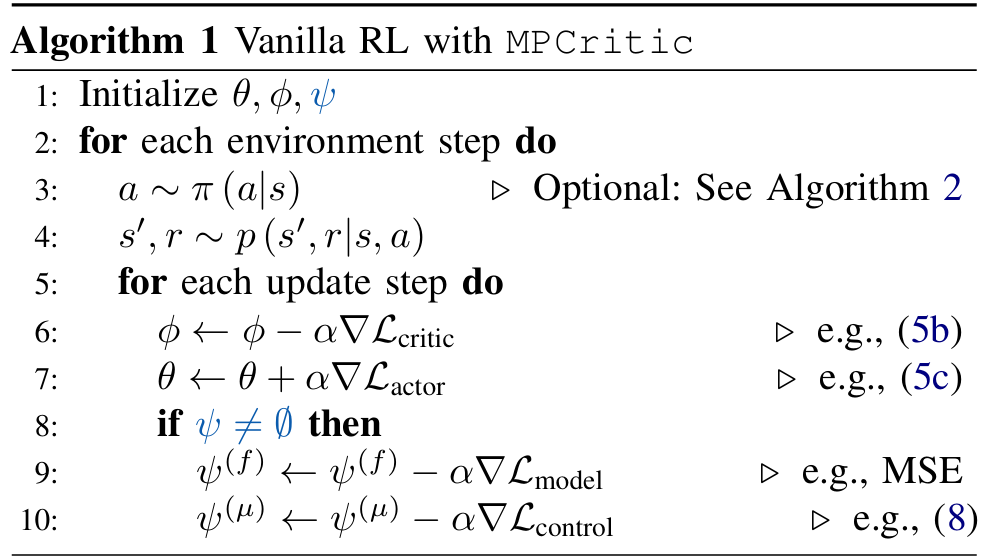

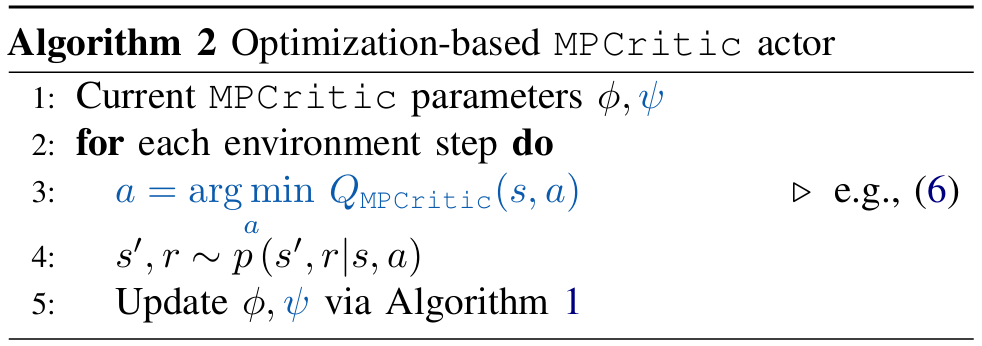